In [47]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [49]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, Ridge
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.svm import SVR

In [71]:
train = pd.read_csv('./housing_data/train.csv')
test = pd.read_csv('./housing_data/test.csv')
houses = pd.concat([train, test], sort=False)

train.shape, test.shape

((1460, 81), (1459, 80))

In [72]:
# look at categorical and numerical features separately 
houses.select_dtypes(include="object").head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [73]:
houses.select_dtypes(exclude="object").head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,61,0,0,0,0,0,2,2008,208500.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,298,0,0,0,0,0,0,5,2007,181500.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,42,0,0,0,0,0,9,2008,223500.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,35,272,0,0,0,0,2,2006,140000.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,192,84,0,0,0,0,0,12,2008,250000.0


In [ ]:
# lets look at null values for categorical data
train.select_dtypes(include="object").isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [ ]:
# null values for numerical data
train.select_dtypes(exclude="object").isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [76]:
# drop the columns with too many null values 

train.drop(['Alley', 'PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)
test.drop(['Alley', 'PoolQC','Fence', 'MiscFeature'], axis=1, inplace=True)

In [ ]:
# some remaining columns still have null values 
# fill them with Unknown

missing_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 
            'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'PavedDrive', 'Electrical','MasVnrType']

for col in missing_cols:
    train[col] = train[col].fillna('Unknown')
    test[col] = test[col].fillna('Unknown')

In [79]:
print(train.GarageType.isnull().sum())
print(test.GarageType.isnull().sum())

0
0


In [ ]:
# Now lets handle missing values of numerical features

train['LotFrontage']=train['LotFrontage'].fillna(train.LotFrontage.mean())
test['LotFrontage']= test['LotFrontage'].fillna(test.LotFrontage.mean())
train['MasVnrArea']= train['MasVnrArea'].fillna(train.MasVnrArea.mean())
test['MasVnrArea']= test['MasVnrArea'].fillna(test.MasVnrArea.mean())
train['GarageYrBlt']= train['GarageYrBlt'].fillna(0)
test['GarageYrBlt']= test['GarageYrBlt'].fillna(0)

test['BsmtFinSF1']= test['BsmtFinSF1'].fillna(test.BsmtFinSF1.mean())
test['BsmtFinSF2']= test['BsmtFinSF2'].fillna(test.BsmtFinSF2.mean())
test['BsmtUnfSF']= test['BsmtUnfSF'].fillna(test.BsmtUnfSF.mean())
test['BsmtFullBath']= test['BsmtFullBath'].fillna(test.BsmtFullBath.mean())
test['BsmtHalfBath']= test['BsmtHalfBath'].fillna(test.BsmtHalfBath.mean())
test['GarageCars']= test['GarageCars'].fillna(test.GarageCars.mean())
test['TotalBsmtSF']= test['TotalBsmtSF'].fillna(test.TotalBsmtSF.mean())
test['GarageArea'] = test['GarageArea'].fillna(test.GarageArea.mean())

In [82]:
test.columns[test.isnull().any()].tolist()

['MSZoning',
 'LotFrontage',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'SaleType']

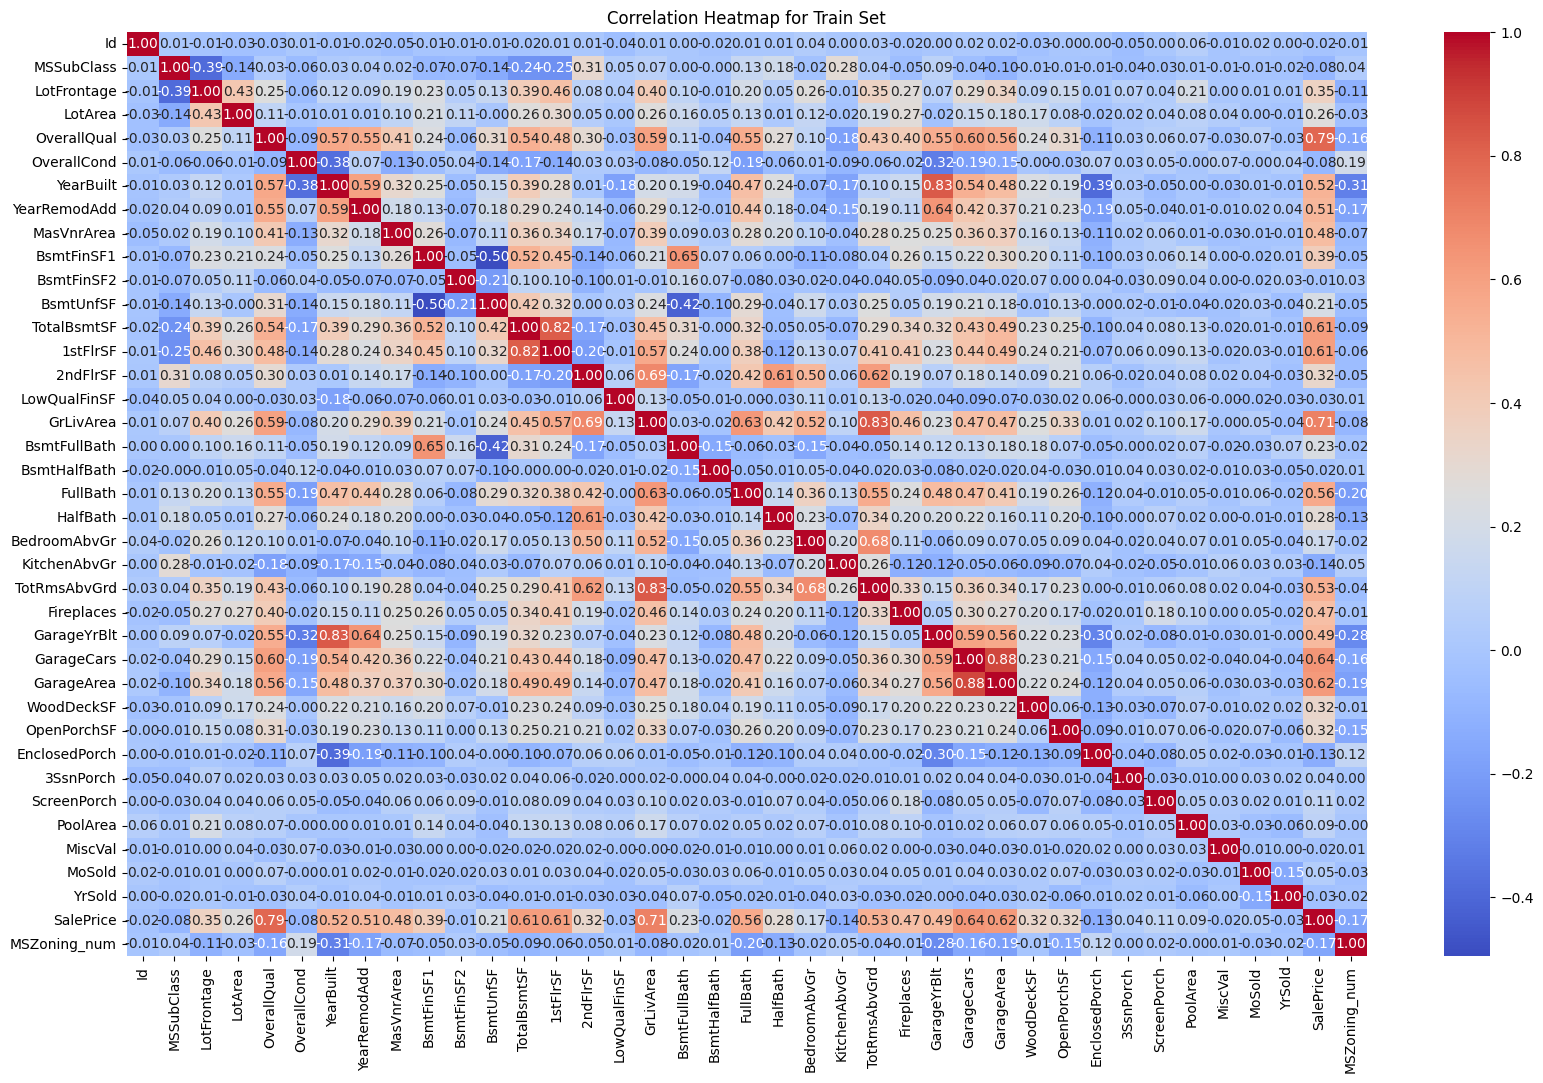

In [107]:
plt.figure(figsize=(20, 12))
sns.heatmap(train.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap for Train Set")
plt.show()

In [113]:
#removing outliers recomended by author
train = train[train['GrLivArea']<4000]
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_num
count,1456.000000,1456.000000,1197.000000,1456.000000,1456.000000,1456.000000,1456.00000,1456.000000,1448.000000,1456.000000,...,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,729.967033,56.888736,69.693400,10448.784341,6.088599,5.576236,1971.18544,1984.819368,102.087707,436.991071,...,46.221154,22.014423,3.418956,15.102335,2.055632,43.608516,6.326236,2007.817308,180151.233516,3.028846
std,421.722909,42.358363,23.054474,9860.763449,1.369669,1.113966,30.20159,20.652143,177.338930,430.255052,...,65.352424,61.192248,29.357056,55.828405,35.383772,496.799265,2.698356,1.329394,76696.592530,0.632884
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.00000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,364.750000,20.000000,59.000000,7538.750000,5.000000,5.000000,1954.00000,1966.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000,3.000000
50%,730.500000,50.000000,69.000000,9468.500000,6.000000,5.000000,1972.00000,1993.500000,0.000000,381.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,3.000000
75%,1094.250000,70.000000,80.000000,11588.000000,7.000000,6.000000,2000.00000,2004.000000,164.250000,706.500000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,3.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.00000,2010.000000,1600.000000,2188.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,625000.000000,4.000000


In [122]:
most_corr_features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'Fireplaces', 'GarageCars']

steps = [
    ('imputer', SimpleImputer(strategy='mean')),
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', Lasso(alpha=1000, fit_intercept=True))
]

pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(train[most_corr_features], train['SalePrice'], train_size=0.8, test_size=0.2, random_state=3)

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))
print(pipeline.score(X_test, y_test))

0.9135965161482649
0.8992069757001747
